In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [2]:
def plot_payoffs(axes, df, xlable, ylable, title):
    axes.axvline(x=100,color='0')
    axes.axhline(y=100,color='0')
    axes.set_xlabel(xlable)
    axes.set_ylabel(ylable)
    axes.set_title(title)
    df.plot(ax=axes, lw=3,grid=True)

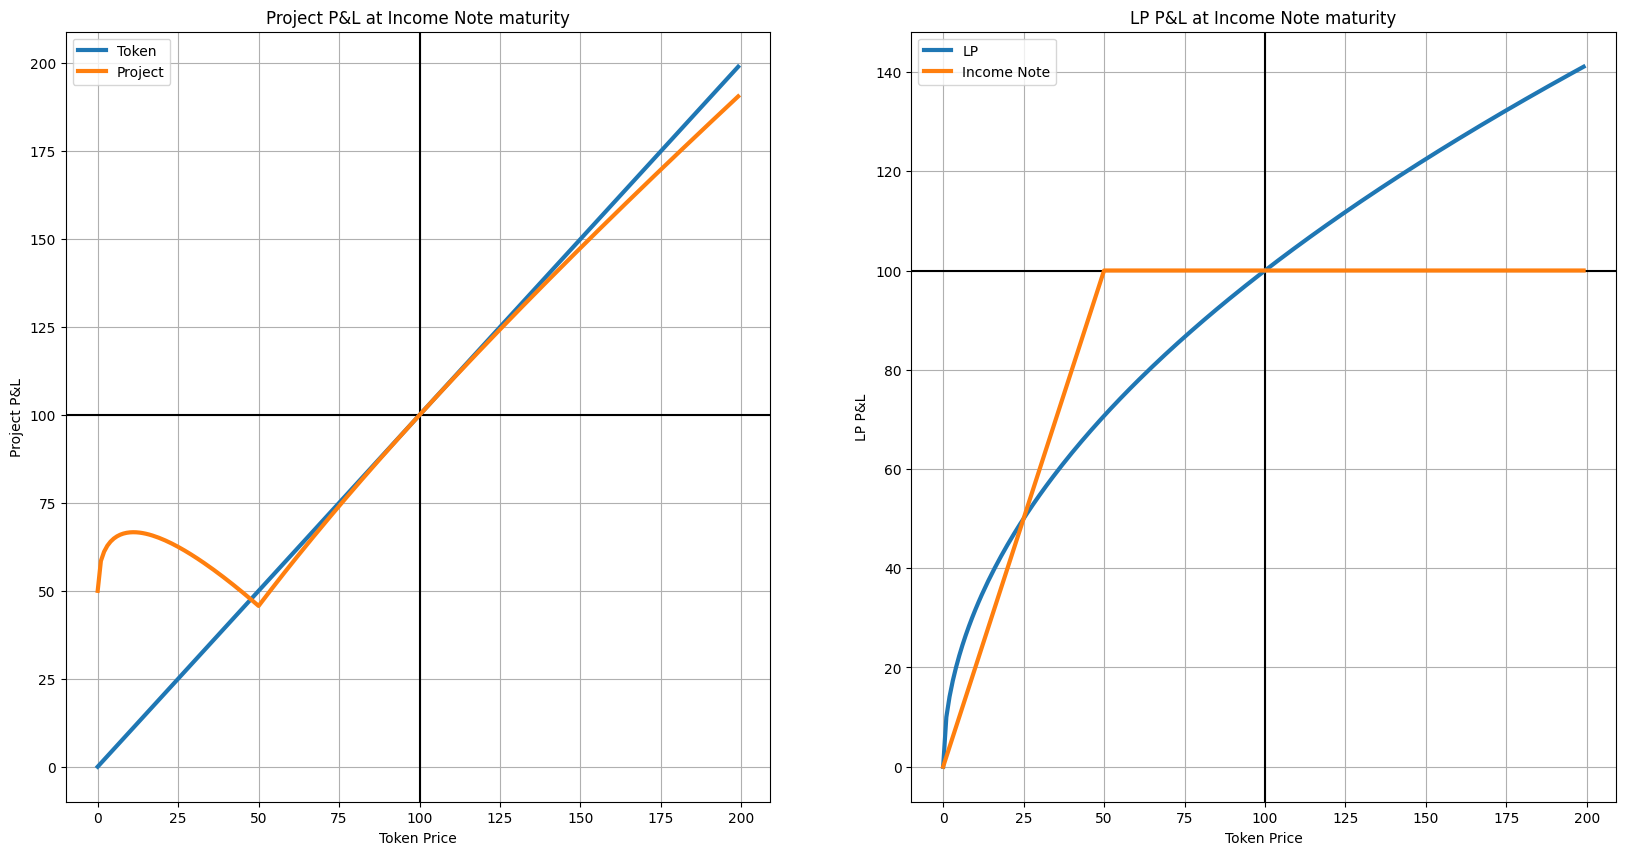

In [3]:
from payoff import lp, income_vanilla
N = 100
p0 = 100
prices=range(0, 200, 1)
data = [[p, 
         lp(p, p0=p0, n=N), 
         income_vanilla(p, 50, 2, N),
         lp(p, p0=100, n=N) + 50 + 50 * p / p0 - income_vanilla(p, 50, 2, N)
        ] for p in prices]
df = pd.DataFrame(data, columns=["Token", "LP", "Income Note", "Project"], index=prices)
#df.plot(figsize=(12,6), grid=True)
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
plot_payoffs(axes[0], df[["Token","Project"]],'Token Price', 'Project P&L', 'Project P&L at Income Note maturity')
plot_payoffs(axes[1], df[["LP", "Income Note"]],'Token Price', 'LP P&L', 'LP P&L at Income Note maturity')
#fig.savefig('income-note.png')


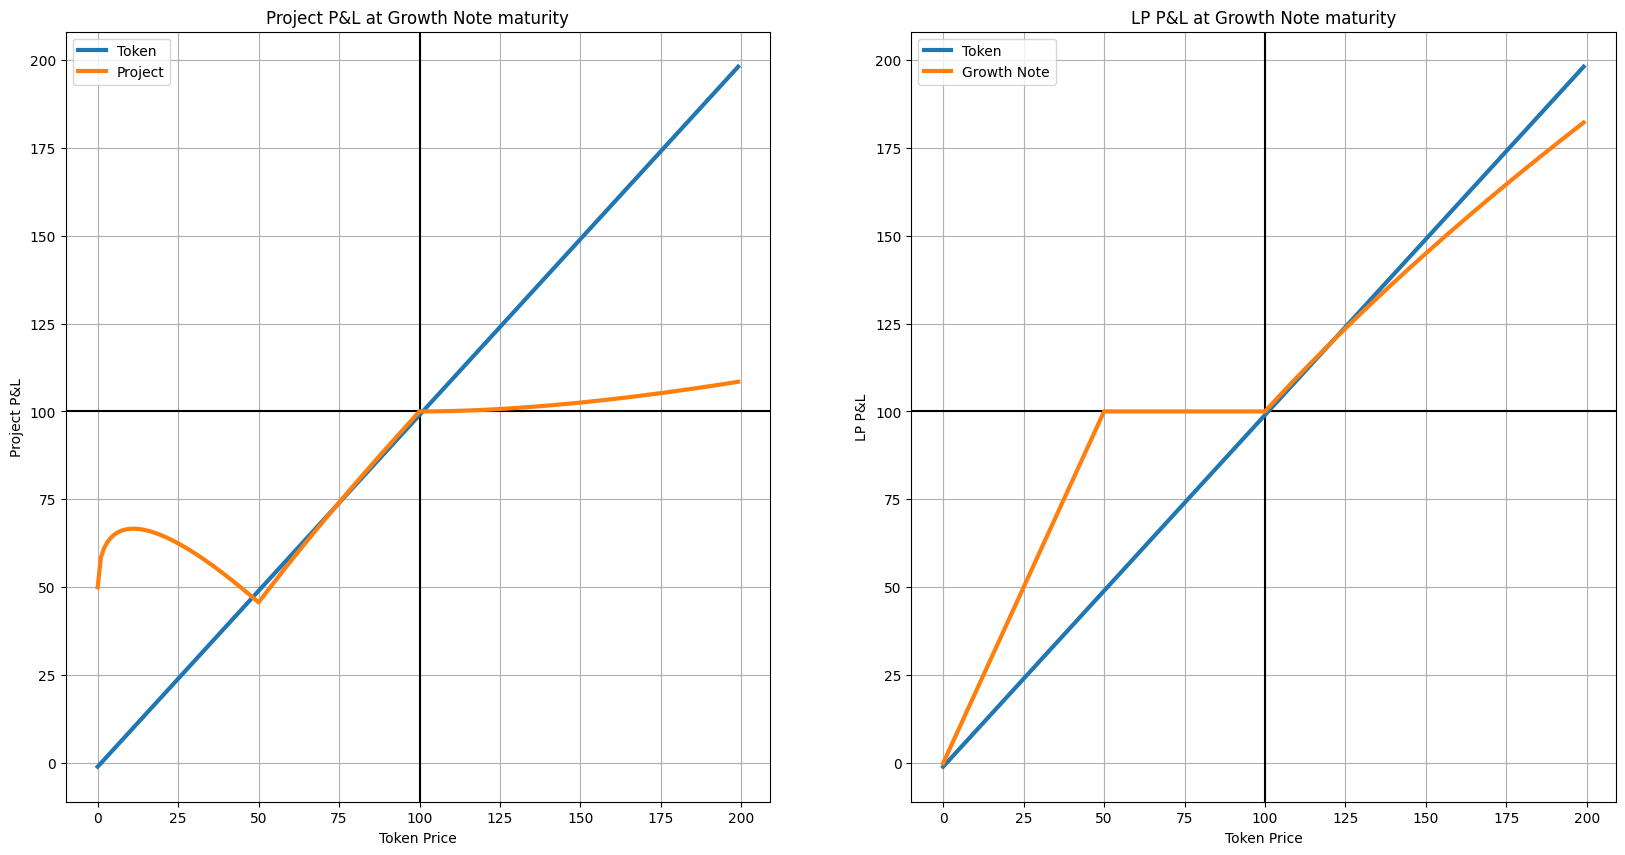

In [4]:
from payoff import lp, growth_vanilla
N = 100
L = 2
p0 = 100
prices=range(0, 200, 1)
data = [[p-1, 
         lp(p, p0=p0, n=N), 
         growth_vanilla(p, 50, 2, L, N),
         lp(p, p0=100, n=N) + 50 + 50 * p / p0 - growth_vanilla(p, 50, 2, L, N)
        ] for p in prices]
df = pd.DataFrame(data, columns=["Token", "LP", "Growth Note", "Project"], index=prices)
#df.plot(figsize=(12,6), grid=True)
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
plot_payoffs(axes[0], df[["Token","Project"]],'Token Price', 'Project P&L', 'Project P&L at Growth Note maturity')
plot_payoffs(axes[1], df[["Token", "Growth Note"]],'Token Price', 'LP P&L', 'LP P&L at Growth Note maturity')
#fig.savefig('growth-note.png')

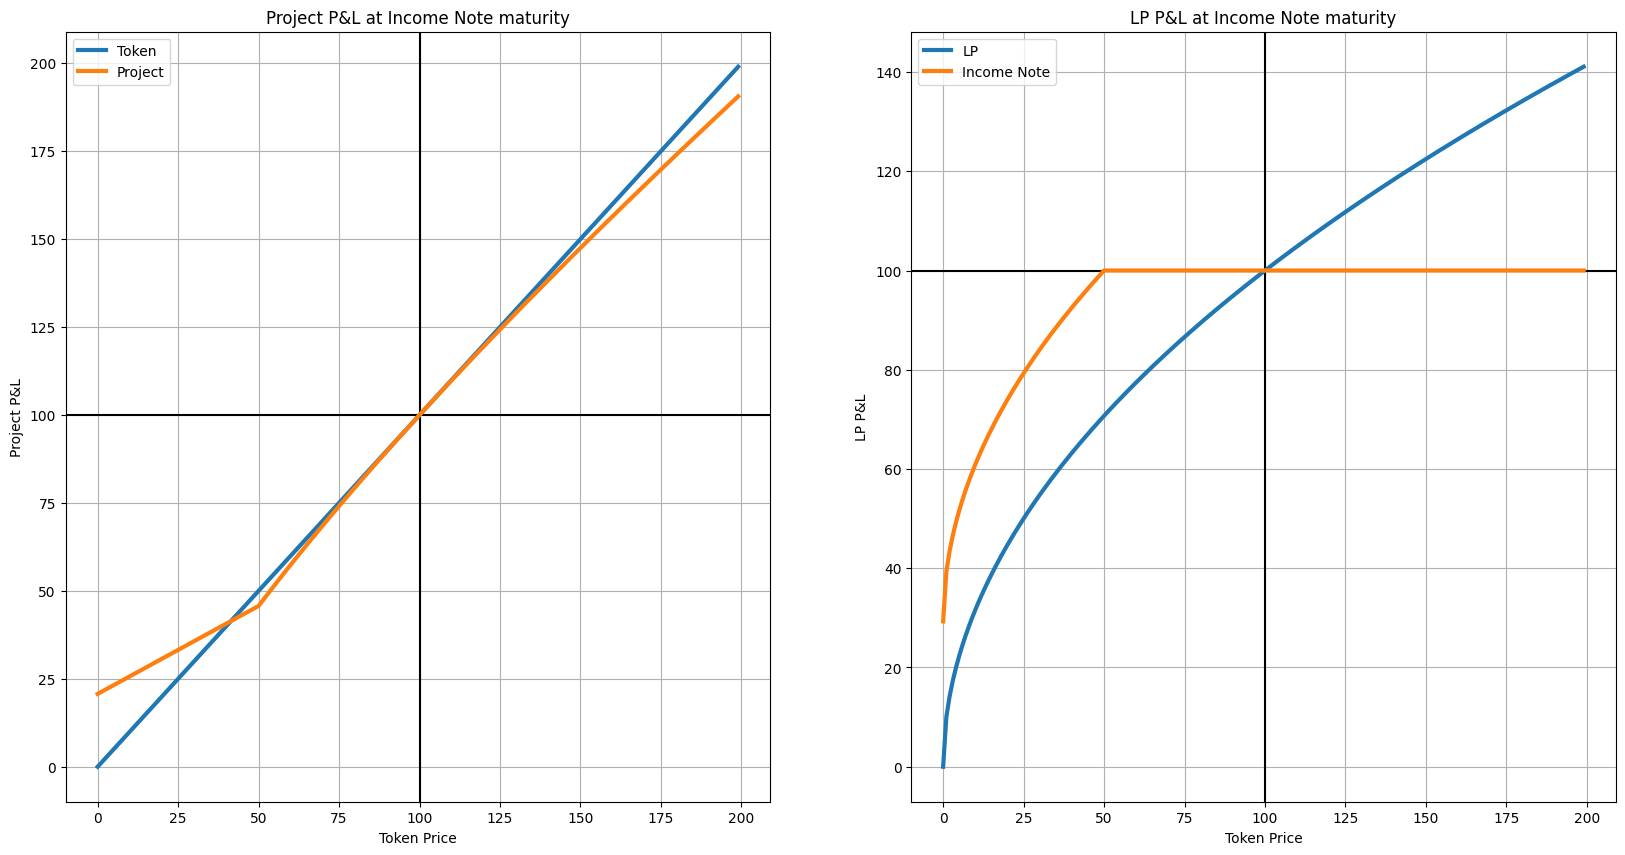

In [5]:
from payoff import lp, income_lp
N = 100
p0 = 100
prices=range(0, 200, 1)
data = [[p, 
         lp(p, p0=p0, n=N), 
         income_lp(p, p0=p0, k=50, n=N),
         lp(p, p0=100, n=N) + 50 + 50 * p / p0 - income_lp(p, p0=p0, k=50, n=N)
        ] for p in prices]
df = pd.DataFrame(data, columns=["Token", "LP", "Income Note", "Project"], index=prices)
#df.plot(figsize=(12,6), grid=True)
fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
plot_payoffs(axes[0], df[["Token","Project"]],'Token Price', 'Project P&L', 'Project P&L at Income Note maturity')
plot_payoffs(axes[1], df[["LP", "Income Note"]],'Token Price', 'LP P&L', 'LP P&L at Income Note maturity')
#fig.savefig('income-note2.png')

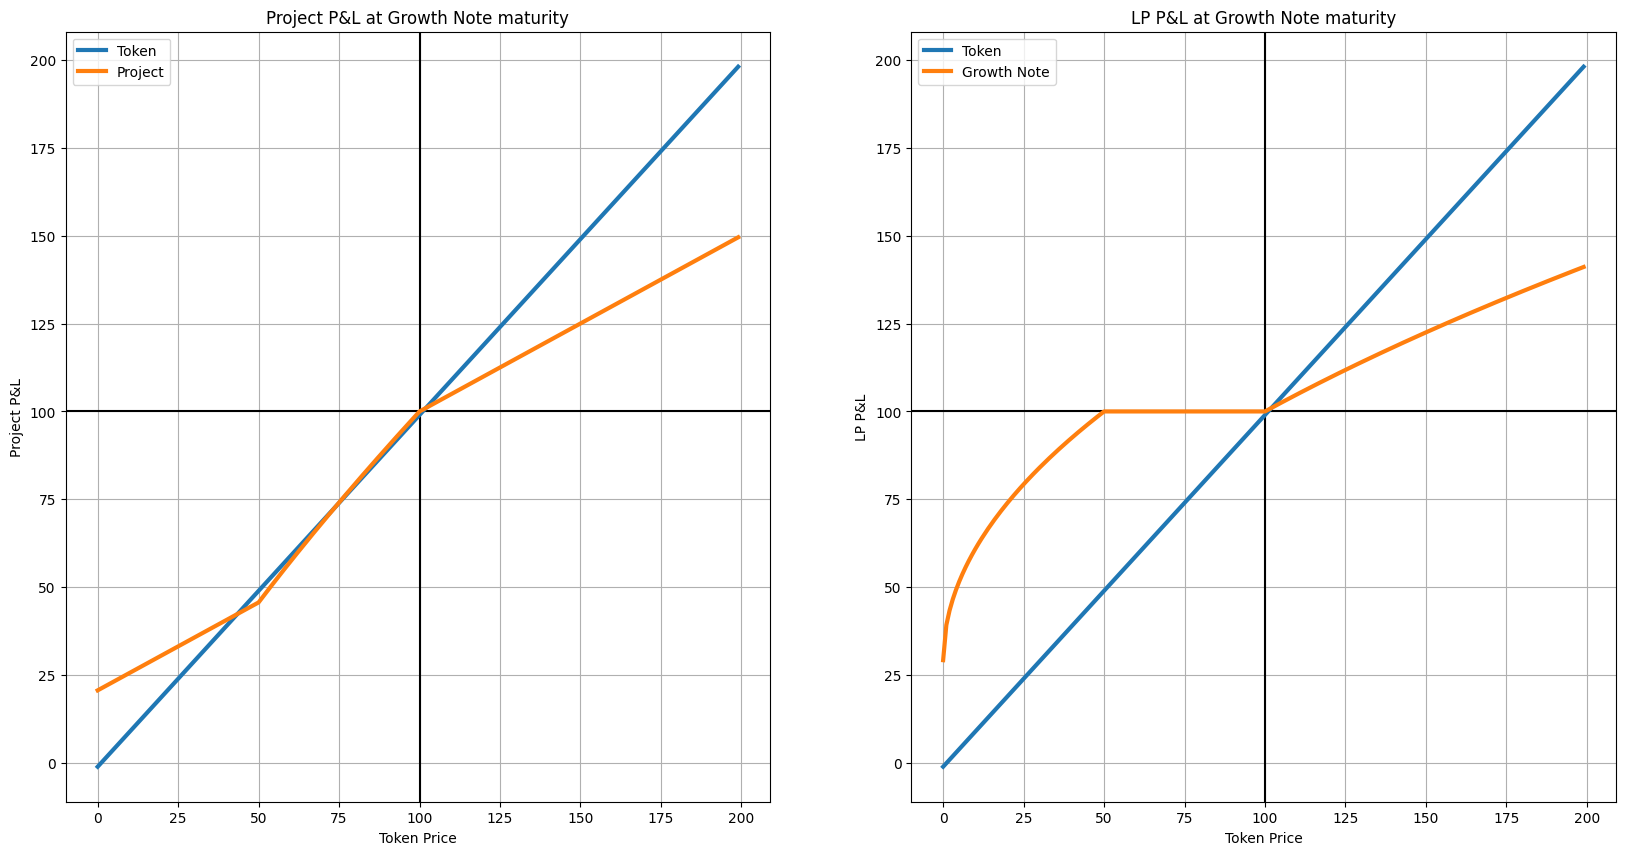

In [6]:
from payoff import lp, growth_lp
N = 100
L = 1
p0 = 100
prices=range(0, 200, 1)
data = [[p-1, 
         lp(p, p0=p0, n=N), 
         growth_lp(p, 50, p0, L, N),
         lp(p, p0=100, n=N) + 50 + 50 * p / p0 - growth_lp(p, 50, p0, L, N)
        ] for p in prices]
df = pd.DataFrame(data, columns=["Token", "LP", "Growth Note", "Project"], index=prices)

#df.plot(figsize=(12,6), grid=True)

fig,axes = plt.subplots(nrows=1,ncols=2, figsize=(20,10))
plot_payoffs(axes[0], df[["Token","Project"]],'Token Price', 'Project P&L', 'Project P&L at Growth Note maturity')
plot_payoffs(axes[1], df[["Token", "Growth Note"]],'Token Price', 'LP P&L', 'LP P&L at Growth Note maturity')
#fig.savefig('growth-note.png')


In [19]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


from ipywidgets import interact, interactive, fixed, interact_manual, widgets
from payoff import lp, growth_lp

def plot_payoffs(payoffs, xlable, ylable, title, L, P, C):
    N = 100
    p0 = 100
    prices=range(0, 200, 1)
    data = [[p-1, 
         lp(p, p0=p0, n=N), 
         growth_lp(p, P, p0, L, N) + C,
         lp(p, p0=100, n=N) + 50 + 50 * p / p0 - growth_lp(p, P, p0, L, N) - C
        ] for p in prices]
    df = pd.DataFrame(data, columns=["Token", "LP", "Growth Note", "Project"], index=prices)
    fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(20,10))
    axes.axvline(x=100,color='0')
    axes.axhline(y=100,color='0')
    axes.set_xlabel(xlable)
    axes.set_ylabel(ylable)
    axes.set_title(title)
    df[payoffs].plot(ax=axes, lw=3,grid=True)
    

#plot_payoffs(["Token","Project"],'Token Price', 'Project P&L', 'Project P&L at Growth Note maturity', L = 2)
notes = interact(plot_payoffs,
         payoffs=fixed(["Token","Growth Note"]),
         xlable=fixed('Token Price'),
         ylable=fixed('PL P&L'),
         title=fixed('LP P&L at Growth Note maturity'),
         P = widgets.FloatSlider(min=0.0, max=100.0, value=50.0, step=5, description="Protection"), 
         C = widgets.FloatSlider(min=0.0, max=20.0, value=0.0, step=1, description="Coupon"), 
         L = widgets.FloatSlider(min=0.0, max=3.0, value=1.0, step=0.25, description="Participation")) 

interactive(children=(FloatSlider(value=1.0, description='Participation', max=3.0, step=0.25), FloatSlider(val…